In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [227]:
df=pd.read_csv('/content/glass.data')


In [228]:
df.columns=['Id','RefractiveIndex','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of Glass']

In [229]:
y.coulmns=['Id','RefractiveIndex','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of Glass']

In [230]:
df.head()

,Id,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


**EDA**

In [231]:
df.describe()

,Id,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [232]:
df.isnull().sum()

Id                 0
RefractiveIndex    0
Na                 0
Mg                 0
Al                 0
Si                 0
K                  0
Ca                 0
Ba                 0
Fe                 0
Type of Glass      0
dtype: int64

In [233]:
label0=df['Type of Glass'].map({1:'building_windows_float_processed',2:'building_windows_non_float_processed',3:'vehicle_windows_float_processed',4:'vehicle_windows_non_float_processed (none in this database)',5:' containers',6:'tableware',7:'headlamps'})

In [234]:
label1=label0.value_counts().index

In [235]:
Type_of_Glass=df['Type of Glass'].value_counts().values

([<matplotlib.patches.Wedge at 0x7f3ce9c835e0>,
 [Text(0.47831599038201134, 0.9905623722637943, 'building_windows_non_float_processed'),
  Text(-1.0923514515516006, -0.12949249512273334, 'building_windows_float_processed'),
  Text(-0.008111992133735426, -1.0999700884949657, 'headlamps'),
  Text(0.6840252159918784, -0.8614577783543802, 'vehicle_windows_float_processed'),
  Text(0.9870081054410648, -0.48560786628064434, ' containers'),
  Text(1.0903227911648539, -0.14558918595308745, 'tableware')],
 [Text(0.2608996311174607, 0.5403067485075241, '35.68%'),
  Text(-0.5958280644826912, -0.07063227006694545, '32.39%'),
  Text(-0.004424722982037505, -0.5999836846336175, '13.62%'),
  Text(0.3731046632682972, -0.46988606092057095, '7.98%'),
  Text(0.538368057513308, -0.2648770179712605, '6.10%'),
  Text(0.5947215224535566, -0.0794122832471386, '4.23%')])

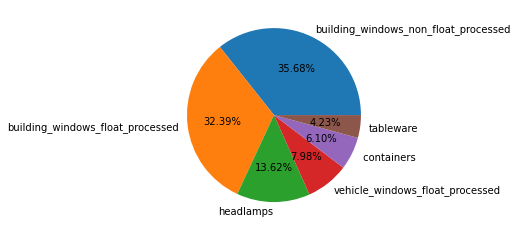

In [236]:
plt.pie(Type_of_Glass,labels=label1,autopct='%1.2f%%')

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
x=df.iloc[:,1:10]
y=df['Type of Glass']

In [239]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [240]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((149, 9), (149,), (64, 9), (64,))

In [241]:
from sklearn.neighbors import KNeighborsClassifier

In [242]:
knn=KNeighborsClassifier(n_neighbors=1)

In [243]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [244]:
pred=knn.predict(x_test)

In [255]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [246]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.66      0.95      0.78        20
           2       0.89      0.65      0.76        26
           3       0.67      0.33      0.44         6
           5       0.75      0.75      0.75         4
           7       0.89      1.00      0.94         8

    accuracy                           0.77        64
   macro avg       0.77      0.74      0.73        64
weighted avg       0.79      0.77      0.76        64



In [254]:
print(confusion_matrix(y_test,pred))

[[19  1  0  0  0]
 [ 7 17  1  1  0]
 [ 3  1  2  0  0]
 [ 0  0  0  3  1]
 [ 0  0  0  0  8]]


In [256]:
print(accuracy_score(y_test,pred))

0.765625


In [260]:
from scipy.spatial import distance

In [262]:
euclid_model = KNeighborsClassifier(n_neighbors=8, metric=distance.sqeuclidean)
euclid_model.fit(x_train,y_train)


KNeighborsClassifier(metric=<function sqeuclidean at 0x7f3cef8ed430>,
                     n_neighbors=8)

In [263]:
manhattan_model=KNeighborsClassifier(n_neighbors=8,metric=distance.cityblock)
manhattan_model.fit(x_train,y_train)

KNeighborsClassifier(metric=<function cityblock at 0x7f3cef8ed820>,
                     n_neighbors=8)

In [266]:
manhattan_predictions = manhattan_model.predict(x_test)
euclid_predictions = euclid_model.predict(x_test) 
df = pd.DataFrame({'actual': y_test, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()


,actual,manhattan,euclid
143,2,1,1
104,2,5,5
42,1,1,1
45,1,1,1
190,7,7,7


In [274]:
manhattan_count = len(df.loc[df['manhattan'] == df['actual']])
euclid_count = len(df.loc[df['euclid'] == df['actual']])
print('Manhattan Accuracy: {}%'.format(round(100*manhattan_count/len(df), 2)))
print(classification_report(y_test, manhattan_predictions, target_names=df['actual'].astype(str).unique()))
print ('\n')
print('Square Euclidean Accuracy: {}%'.format(round(100*euclid_count/len(df), 2)))
print(classification_report(y_test, euclid_predictions, target_names=df['actual'].astype(str).unique()))


Manhattan Accuracy: 64.06%
              precision    recall  f1-score   support

           2       0.53      1.00      0.69        20
           1       0.92      0.46      0.62        26
           7       0.00      0.00      0.00         6
           3       0.33      0.25      0.29         4
           5       0.80      1.00      0.89         8

    accuracy                           0.64        64
   macro avg       0.52      0.54      0.50        64
weighted avg       0.66      0.64      0.59        64



Square Euclidean Accuracy: 65.62%
              precision    recall  f1-score   support

           2       0.54      1.00      0.70        20
           1       0.87      0.50      0.63        26
           7       0.00      0.00      0.00         6
           3       0.33      0.25      0.29         4
           5       0.89      1.00      0.94         8

    accuracy                           0.66        64
   macro avg       0.53      0.55      0.51        64
weighted avg  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat